In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('./python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

## 모집단과 표본
추측통계에서는 관측대상 전체의 통계적 성질을 그 관측 대상의 일부분만 사용하여 추측한다.

이 때, 추측하고 싶은 관측 대상 전체를 **모집단(population)** 이라 하고, 추측에 사용하는 관측 대상의 일부분을 **표본(sample)** 이라 한다.

모집단에서 표본을 골라내는 일을 **표본추출(sampling)** 이라 하고, 골라낸 표본의 수를 표본 크기 또는 **샘플 사이즈** 라고 한다.

그리고 표본을 바탕으로 계산한 평균이나 분산, 상관계수 등을 **표본통계량** 이라 하고, 모집단의 평균이나 분산, 상관계수 등을 **모수** 라고 한다.

예를들어 표본평균으로 모평균을 추측하면, 표본평균은 모평균의 **추정량(estimator)** 이라고 한다.

그리고 실제로 표본의 데이터를 이용하여 계산한 결과를 **추정값(estimate)** 이라고 한다

### 표본 추출 방법
조금이라도 편향적인 데이터 추출을 막기위해 임의로 표본을 추출하는 방법을 **무작위추출(random sampling)** 이라고 한다

하지만 무작위 추출의 결과로 편향된 데이터가 포함될 수 있기 때문에 주의를 기울여야 한다

여러차례 동일한 표본을 선택하는 추출 방법을 **복원추출(sampling with replacement)** 이라고 하고, 동일한 표본은 한 번만 선택하는 방법을 **비복원추출(sampling without replacement)** 라고 한다

In [3]:
# 같은 숫자가 나올 수 있으므로 기본적으로 np.random.choice는 복원추출이다
np.random.choice([1,2,3],3)

array([2, 1, 1])

In [4]:
# 비복원 추출
np.random.choice([1,2,3],3,replace=False)

array([2, 3, 1])

In [5]:
# 시드를 미리 정해두면 동일한 난수를 얻을 수 있다
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [6]:
# 모집단에서 20명의 성적을 표본추출하여 표본평균을 구함
np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean()

70.4

In [7]:
scores.mean()

69.53

In [8]:
# 표본평균은 대체로 70점 전후이지만, 나름대로 산포도도 나타낸다
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균',sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률모형(probability model)

무작위 추출로 인한 불확정성을 수반한 현상을 해석하기 위해 **확률(probability)** 를 사용한다.

확률을 사용한 무작위 추출 혹은 주사위를 모델링 한 것을 **확률 모형(probability model)**

### 확률의 기본

결과를 알아맞힐 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것을 **확률변수(ramdomvariable)** 라고 한다

주사위를 굴릴 때까지 어떤 눈이 나올지 알 수 없지만, 주사위를 굴리면 눈은 하나씩 확정된다.

이와같이 확률변수의 결과를 관측하는 것을 **시행(trial)** 이라 하고, 시행에 의해 관측되는 값을 **실현값(realization)** 이라고 한다. 또한 '눈이 1'이나 '눈이 홀수'처럼 시행 결과로 나타날 수 있는 일을 **사건(event)** 이라 한다

특히 '눈이 1'처럼 더 세부적으로 분해할 수 없는 사건을 **근원사건(elementary event)** 이라고 한다

사건이 **상호배반(mutually exclusive)** 이라는 것은 각 사건이 동시에는 일어날 수 없다는 말이다.

예를들어 '눈이 1 또는 2 또는 3'이라는 사건과 '눈이 6' 이라는 사건은 동시에 일어날 수 없기 때문에 상호배반이다

### 확률분포(Probability Distribution)

확률변수가 어떻게 움직이는지를 나타낸 것.

전체 확률이 1인 확률변수가 취할 수 있는 값이 어떻게 분포하고 있는지 나타낸다.

주사위를 예로 들면 확률분포는 모두 1/6인 균일한 확률분포를 가지는데 이 때, 주사위의 눈을 확률변수 X, 확률분포를 A라고 하면 '확률변수 X는 확률분포 A를 따른다' 라고 한다.

In [9]:
# 불안정한 주사위를 예로 확률분포를 구해보자
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [10]:
np.random.choice(dice,p=prob)

1

In [11]:
num_trial = 100
sample = np.random.choice(dice,num_trial,p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [12]:
freq,_=np.histogram(sample,bins=6,range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency':freq/num_trial},
            index = pd.Index(np.arange(1,7),name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


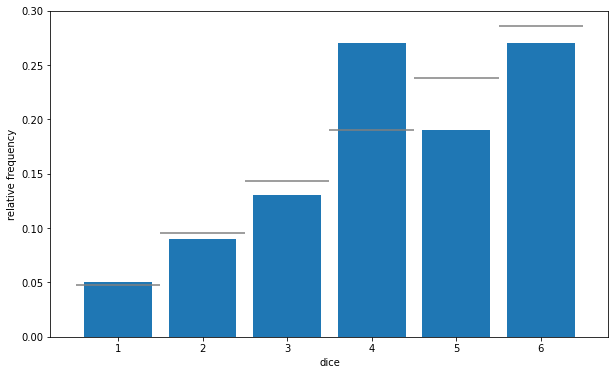

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
#실제의 확률분포를 가로선으로 표시
ax.hlines(prob,np.arange(1,7),np.arange(2,8),colors='gray')
#막대그래프의 [1.5,2.5,...,6.5] 에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

100번의 시행횟수로는 오차가 크기 때문에 10000회로 늘린 결과를 보자

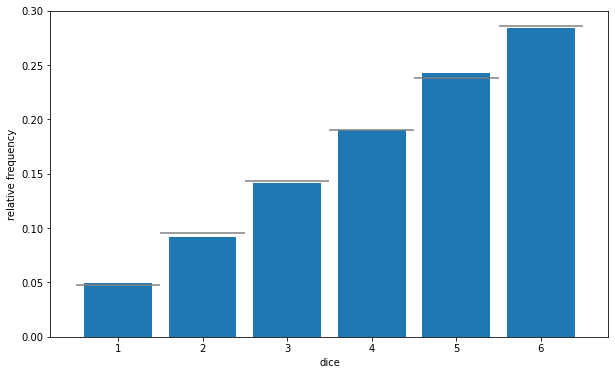

In [17]:
num_trial = 10000
sample = np.random.choice(dice,num_trial,p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
#실제의 확률분포를 가로선으로 표시
ax.hlines(prob,np.arange(1,7),np.arange(2,8),colors='gray')
#막대그래프의 [1.5,2.5,...,6.5] 에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계의 확률

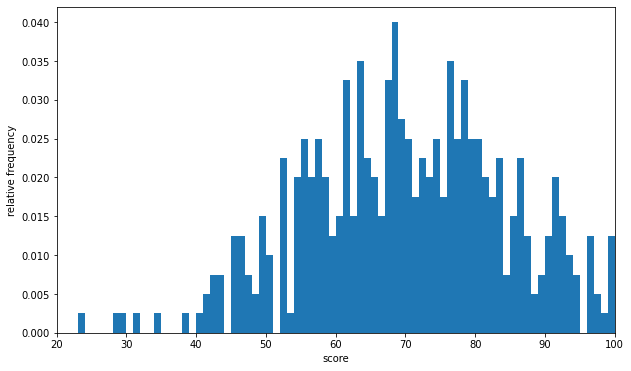

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores,bins=100,range=(0,100),density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

상대도수는 해당 점수를 얻는 확률에 대응한다.

따라서 이 히스토그램은 모집단의 확률분포로 간주할 수 있다

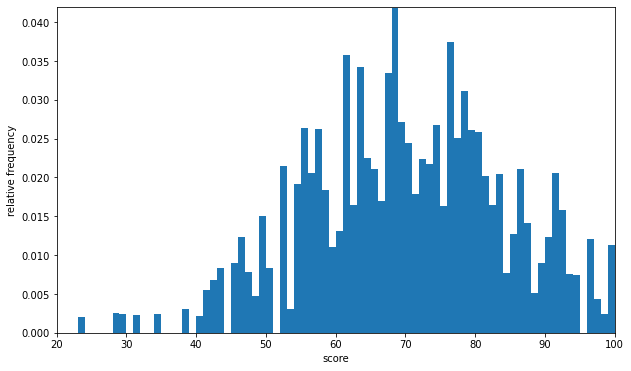

In [20]:
sample = np.random.choice(scores,10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=100,range=(0,100),density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

히스토그램이 실제의 점수 분포에 매우 가까운 형태임을 알 수 있다.

표본 하나하나가 확률변수이므로, 표본들의 평균으로 계산되는 표본평균도 역시 확률변수이다.

표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행한 뒤 히스토그램으로 그려보자

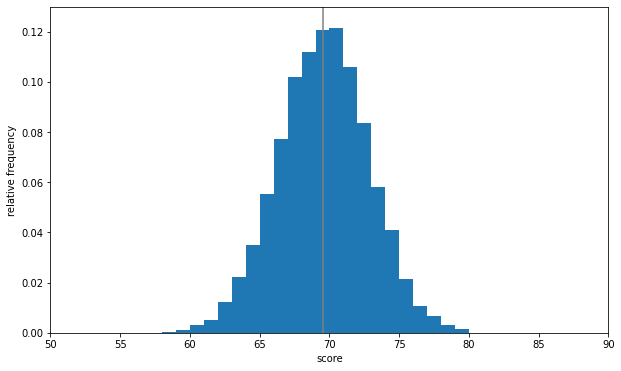

In [21]:
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means,bins=100,range=(0,100),density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()